# Student Grades Prediction Project
.. . . .. . . . . . . . . . . . . . . . . . .. . . . . . . . . . . . .. .

Navin Singh

* Date---> 18/01/2024

# Project Description
The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades

Columns Description- total 43 columns -Seat No : The enrolled number of candidate that took the exams

CGPA : The cumulative GPA based on the four year total grade progress of each candidate .

CGPA is a Final Marks -- provided to student.

• All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam

Predict - CGPA of a student based on different grades in four years

Dataset Link- https://github.com/FlipRoboTechnologies/ML-Datasets/blob/main/Grades/Grades.csv

## Data Exploration

In [1]:
# Importing Some important library 
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load DataSet
df=pd.read_csv('Grades')

In [3]:
df.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [4]:
# work on filter data 
data=pd.read_csv('student.csv')
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [5]:
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [6]:
data.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10
648,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,4,10,11,11


In [7]:
data.shape

(649, 33)

In [8]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [9]:
data.value_counts()

school  sex  age  address  famsize  Pstatus  Medu  Fedu  Mjob      Fjob      reason      guardian  traveltime  studytime  failures  schoolsup  famsup  paid  activities  nursery  higher  internet  romantic  famrel  freetime  goout  Dalc  Walc  health  absences  G1  G2  G3
GP      F    15   R        GT3      T        1     1     at_home   other     home        mother    2           4          0         yes        yes     yes   yes         yes      yes     yes       no        3       1         2      1     1     1       4         13  13  13    1
MS      F    16   R        GT3      T        2     2     other     other     course      father    3           2          0         no         yes     no    no          yes      no      yes       no        3       4         5      1     2     1       1         9   10  11    1
             15   R        GT3      T        3     3     other     services  course      father    2           1          0         no         no      no    no          no   

In [10]:
data.columns.value_counts()

school        1
paid          1
G2            1
G1            1
absences      1
health        1
Walc          1
Dalc          1
goout         1
freetime      1
famrel        1
romantic      1
internet      1
higher        1
nursery       1
activities    1
famsup        1
sex           1
schoolsup     1
failures      1
studytime     1
traveltime    1
guardian      1
reason        1
Fjob          1
Mjob          1
Fedu          1
Medu          1
Pstatus       1
famsize       1
address       1
age           1
G3            1
Name: count, dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [12]:
data.info

<bound method DataFrame.info of     school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel fre

In [13]:
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [14]:
data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

There are no any null values

In [16]:
data.isnull().sum().sum()

0

<Axes: >

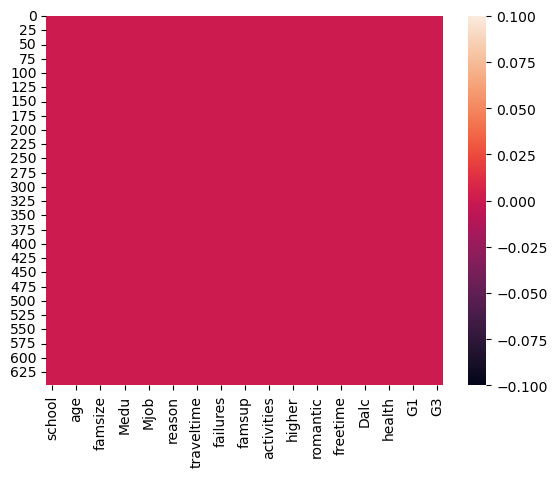

In [17]:
sns.heatmap(data.isnull())

There are no any null values are present 

Our data is clean, therefore no data cleaning required.

## Data Visualization

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

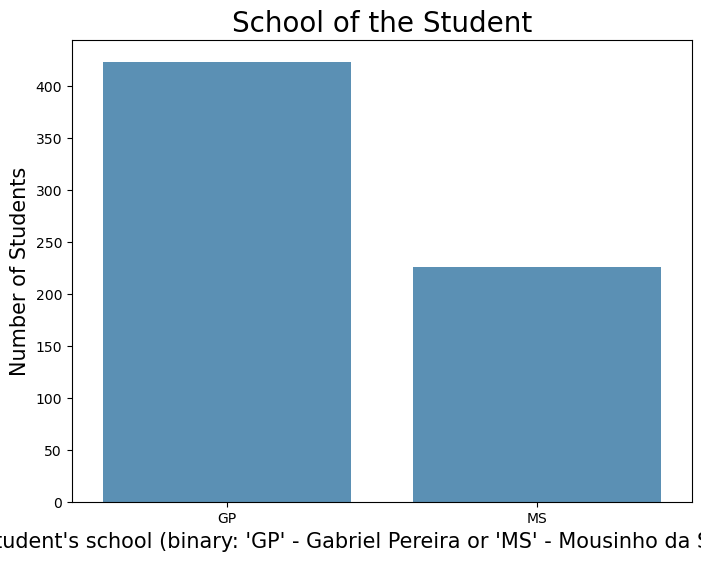

In [19]:
count=data['school'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=count.index,y=count.values, alpha=0.8)
plt.title('School of the Student', fontsize=20)
plt.ylabel('Number of Students', fontsize=15)
plt.xlabel("Student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)", fontsize=15)
plt.show()

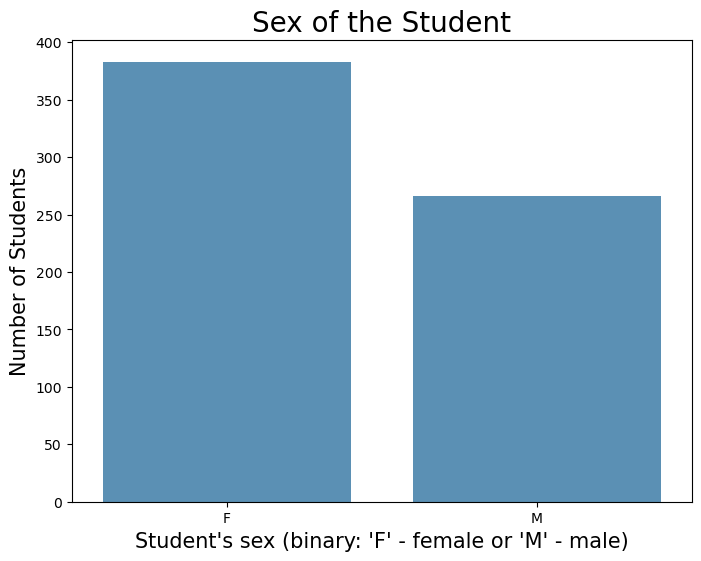

In [20]:
count=data['sex'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=count.index,y=count.values, alpha=0.8)
plt.title('Sex of the Student', fontsize=20)
plt.ylabel('Number of Students', fontsize=15)
plt.xlabel("Student's sex (binary: 'F' - female or 'M' - male)", fontsize=15)
plt.show()

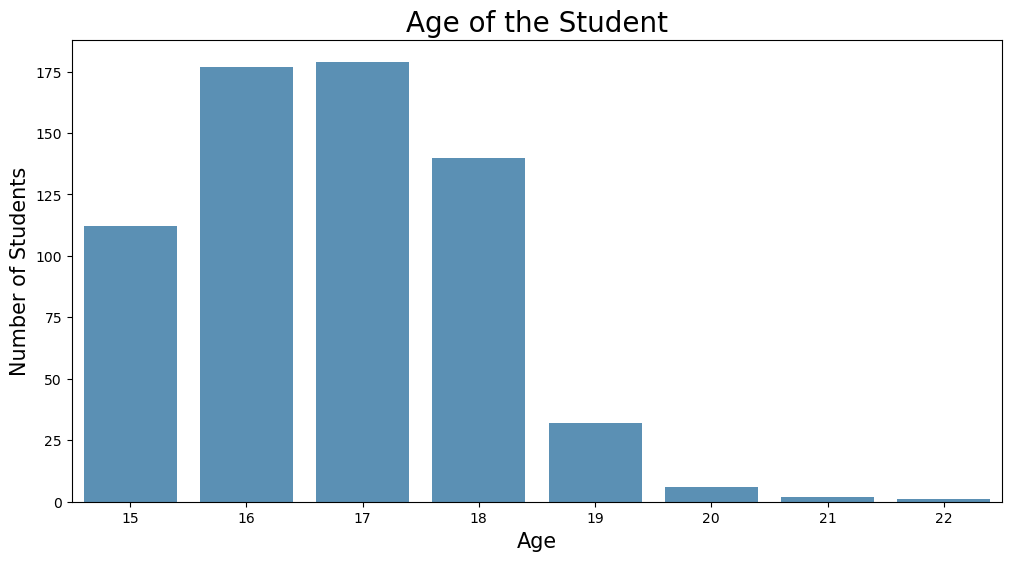

In [21]:
count=data['age'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=count.index,y=count.values, alpha=0.8)
plt.title('Age of the Student', fontsize=20)
plt.ylabel('Number of Students', fontsize=15)
plt.xlabel('Age', fontsize=15)
plt.show()

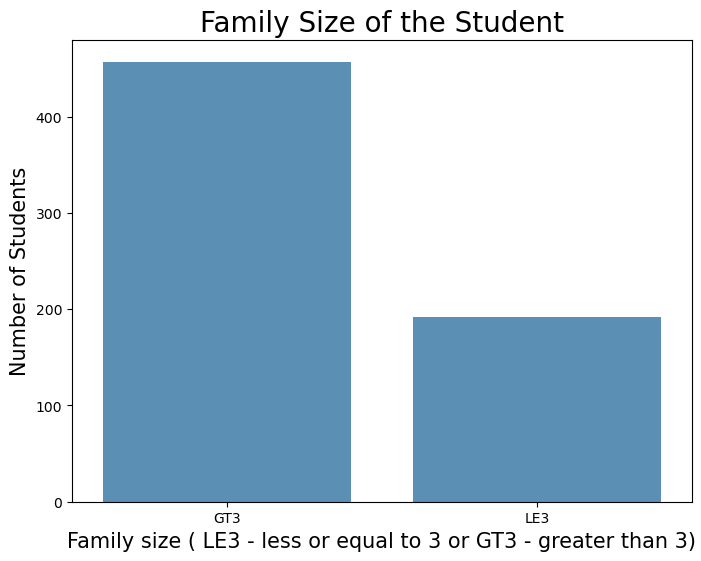

In [22]:
count=data['famsize'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=count.index,y=count.values, alpha=0.8)
plt.title('Family Size of the Student', fontsize=20)
plt.ylabel('Number of Students', fontsize=15)
plt.xlabel('Family size ( LE3 - less or equal to 3 or GT3 - greater than 3)', fontsize=15)
plt.show()

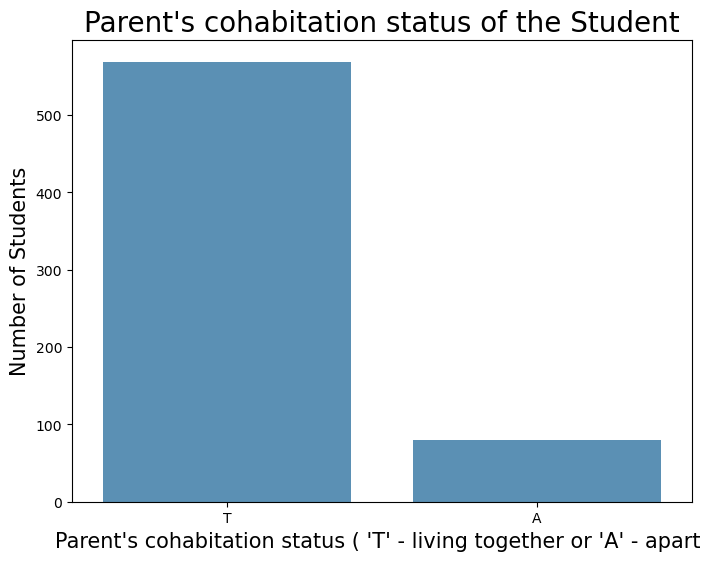

In [23]:
count=data['Pstatus'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=count.index,y=count.values, alpha=0.8)
plt.title("Parent's cohabitation status of the Student", fontsize=20)
plt.ylabel('Number of Students', fontsize=15)
plt.xlabel("Parent's cohabitation status ( 'T' - living together or 'A' - apart)", fontsize=15)
plt.show()

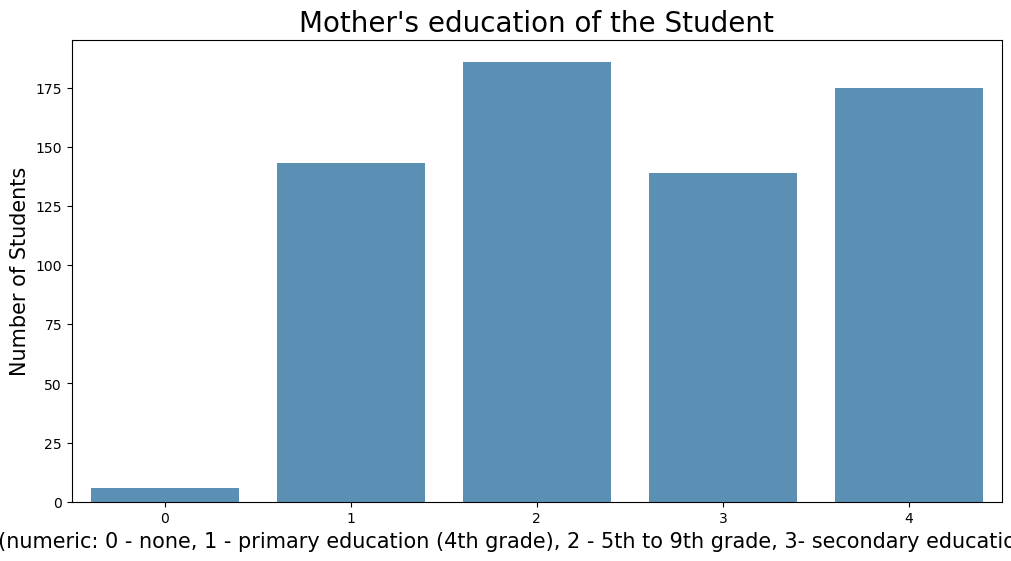

In [24]:
count=data['Medu'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=count.index,y=count.values, alpha=0.8)
plt.title("Mother's education of the Student", fontsize=20)
plt.ylabel('Number of Students', fontsize=15)
plt.xlabel("Mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3- secondary education or 4 - higher education)", fontsize=15)
plt.show()

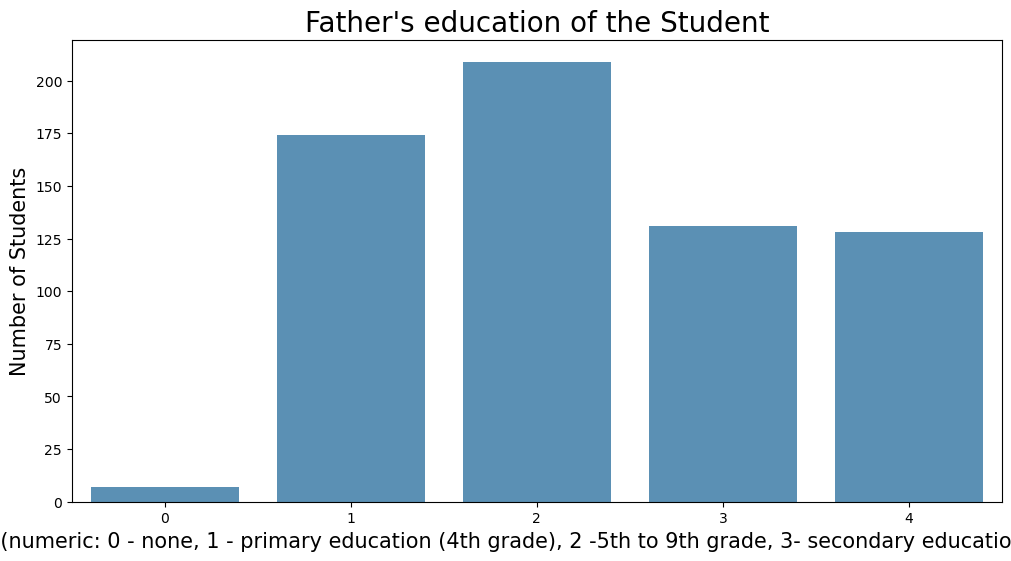

In [25]:
count=data['Fedu'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=count.index,y=count.values, alpha=0.8)
plt.title("Father's education of the Student", fontsize=20)
plt.ylabel('Number of Students', fontsize=15)
plt.xlabel("Father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 -5th to 9th grade, 3- secondary education or 4- higher education)", fontsize=15)
plt.show()

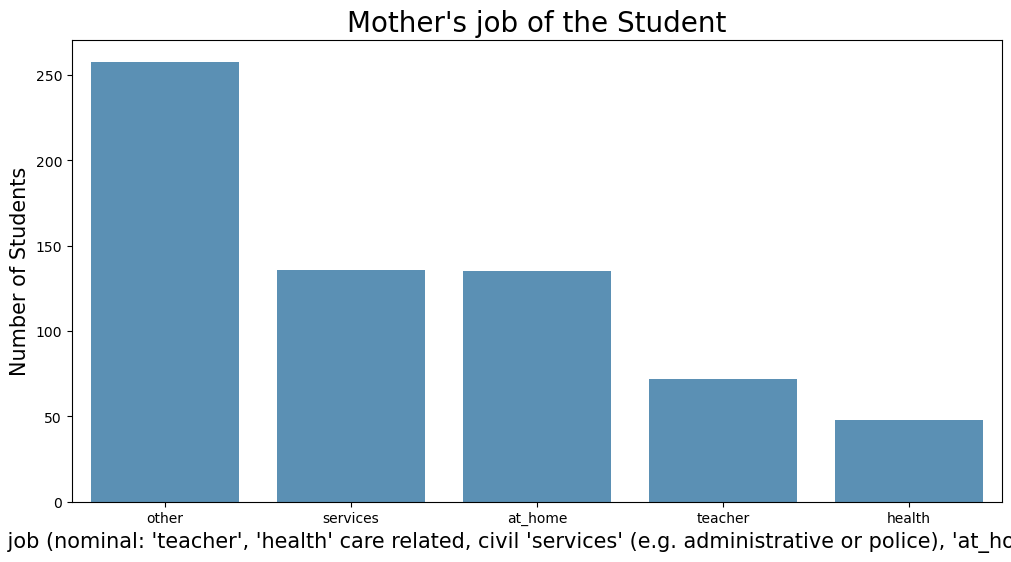

In [26]:
count=data['Mjob'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=count.index,y=count.values, alpha=0.8)
plt.title("Mother's job of the Student", fontsize=20)
plt.ylabel('Number of Students', fontsize=15)
plt.xlabel("Mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')", fontsize=15)
plt.show()

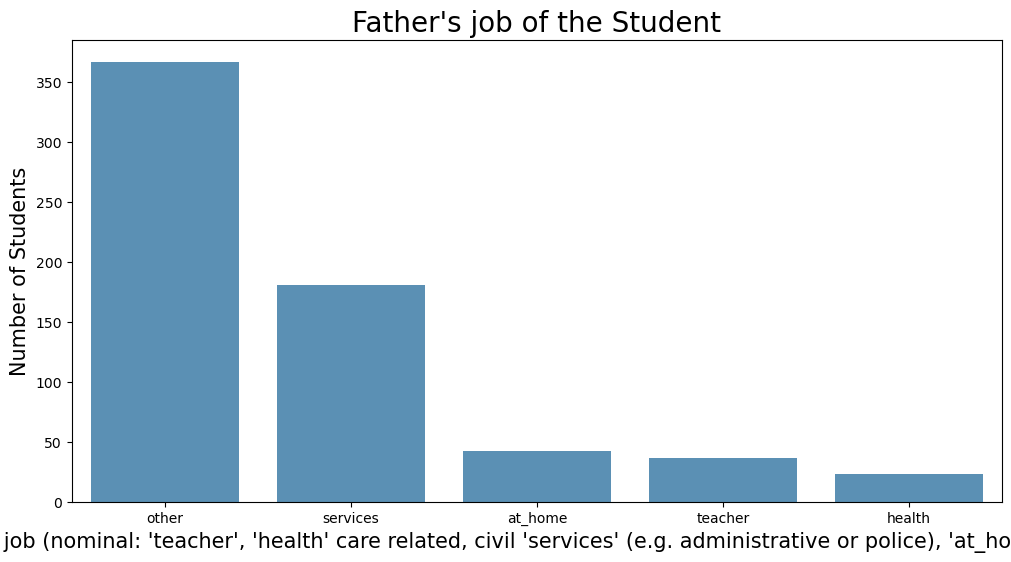

In [27]:
count=data['Fjob'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=count.index,y=count.values, alpha=0.8)
plt.title("Father's job of the Student", fontsize=20)
plt.ylabel('Number of Students', fontsize=15)
plt.xlabel("Father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')", fontsize=15)
plt.show()

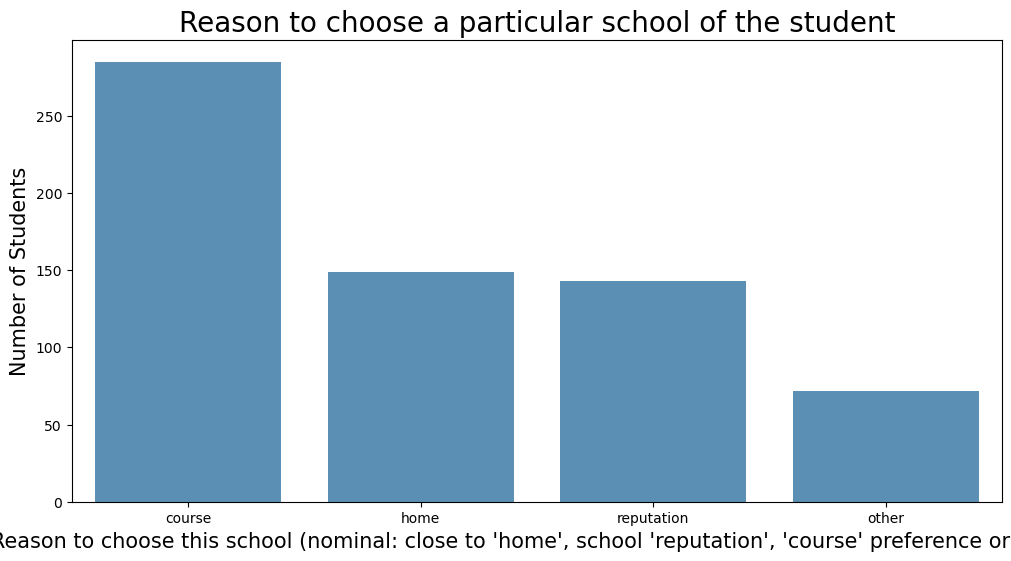

In [28]:
count=data['reason'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=count.index,y=count.values, alpha=0.8)
plt.title("Reason to choose a particular school of the student", fontsize=20)
plt.ylabel('Number of Students', fontsize=15)
plt.xlabel("Reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other'", fontsize=15)
plt.show()

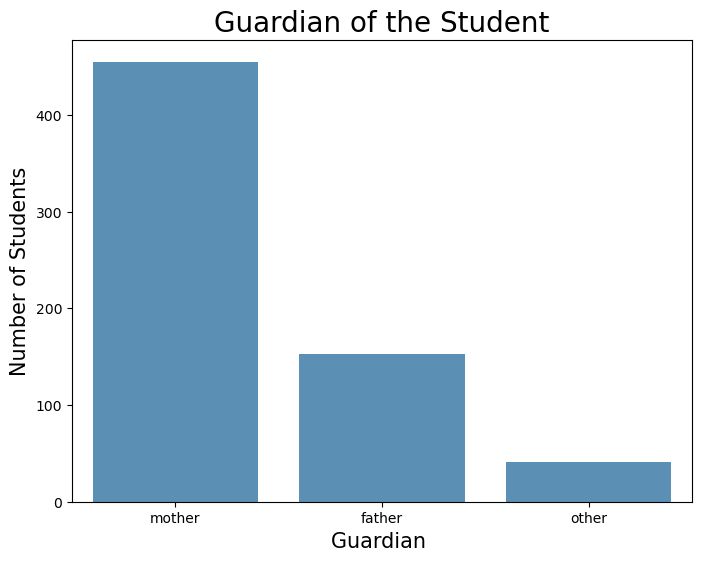

In [29]:
count=data['guardian'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=count.index,y=count.values, alpha=0.8)
plt.title("Guardian of the Student", fontsize=20)
plt.ylabel('Number of Students', fontsize=15)
plt.xlabel("Guardian ", fontsize=15)
plt.show()

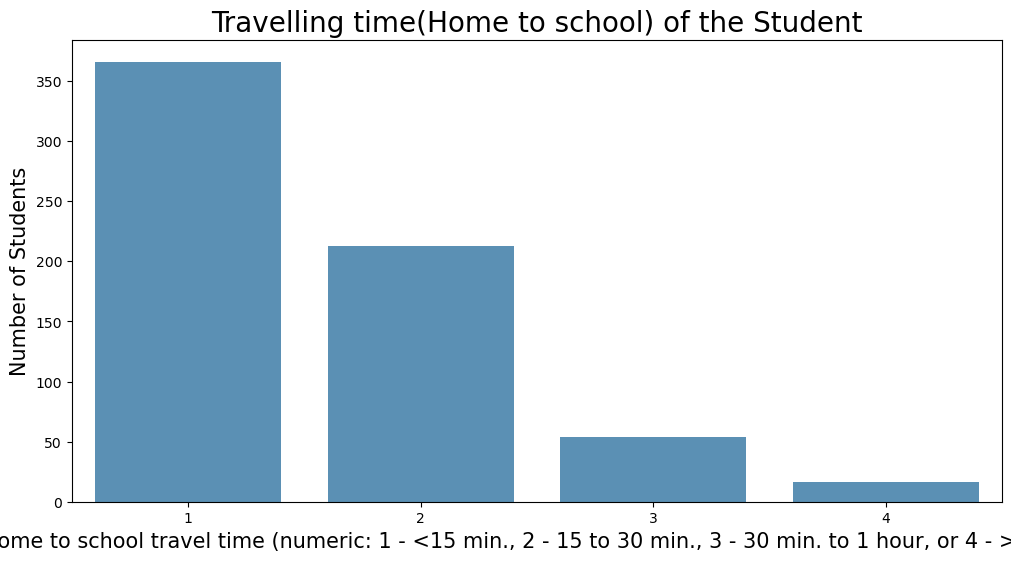

In [30]:
count=data['traveltime'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=count.index,y=count.values, alpha=0.8)
plt.title("Travelling time(Home to school) of the Student", fontsize=20)
plt.ylabel('Number of Students', fontsize=15)
plt.xlabel("Home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)", fontsize=15)
plt.show()

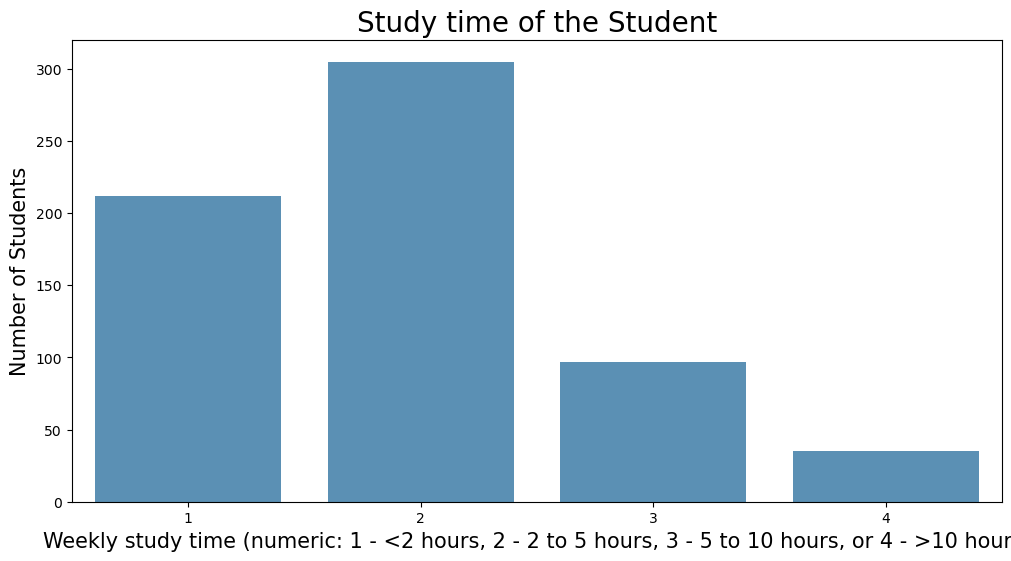

In [31]:
count=data['studytime'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=count.index,y=count.values, alpha=0.8)
plt.title("Study time of the Student", fontsize=20)
plt.ylabel('Number of Students', fontsize=15)
plt.xlabel("Weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)", fontsize=15)
plt.show()

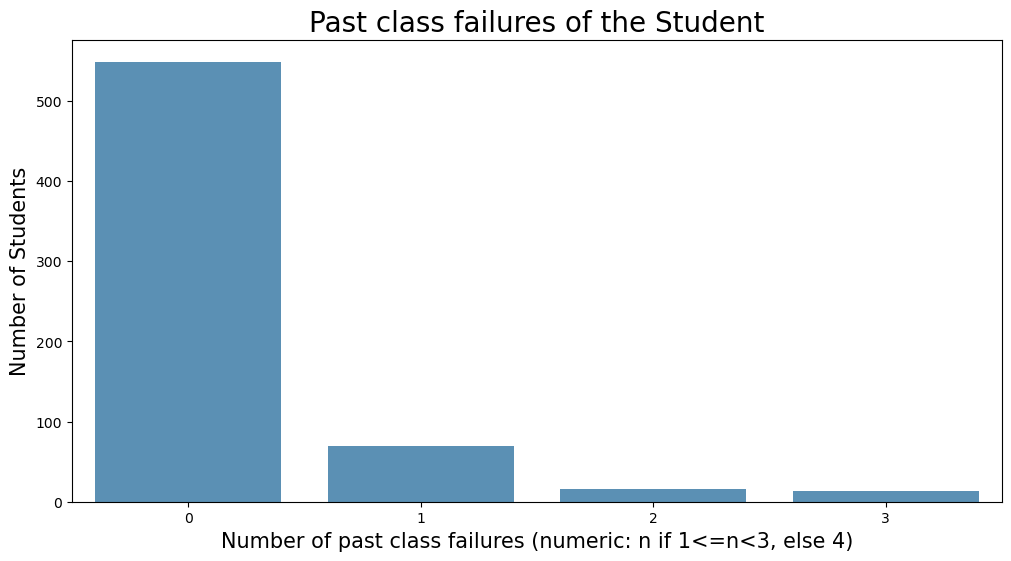

In [32]:
count=data['failures'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=count.index,y=count.values, alpha=0.8)
plt.title("Past class failures of the Student", fontsize=20)
plt.ylabel('Number of Students', fontsize=15)
plt.xlabel("Number of past class failures (numeric: n if 1<=n<3, else 4)", fontsize=15)
plt.show()

Text(0.5, 1.0, 'Extra educational support of the student')

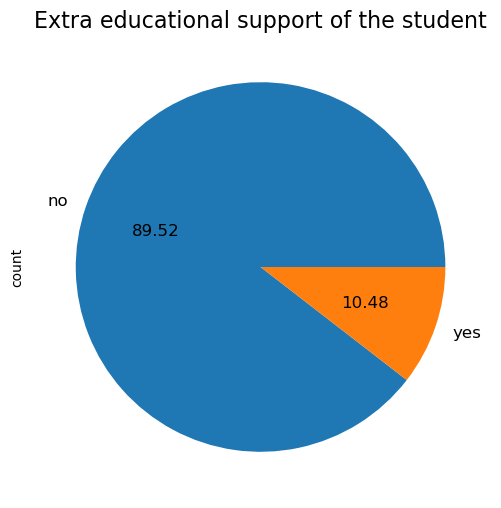

In [33]:
data['schoolsup'].value_counts().plot.pie(autopct='%.2f',figsize=(8,6),fontsize=12)
plt.title("Extra educational support of the student",fontsize=16)

Text(0.5, 1.0, 'Family educational support of the student')

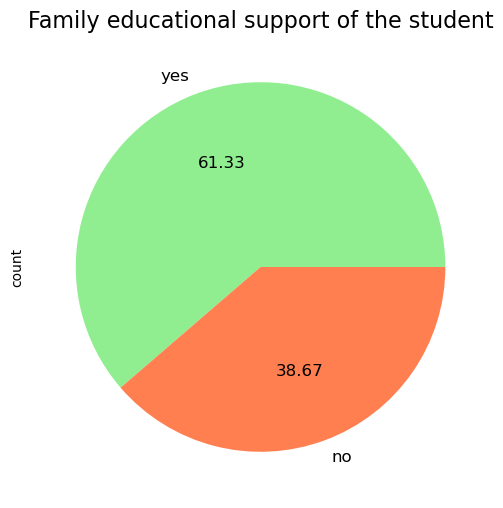

In [34]:
data['famsup'].value_counts().plot.pie(autopct='%.2f',figsize=(8,6),fontsize=12,colors=['lightgreen','coral'])
plt.title("Family educational support of the student",fontsize=16)

Text(0.5, 1.0, 'Extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) of the student')

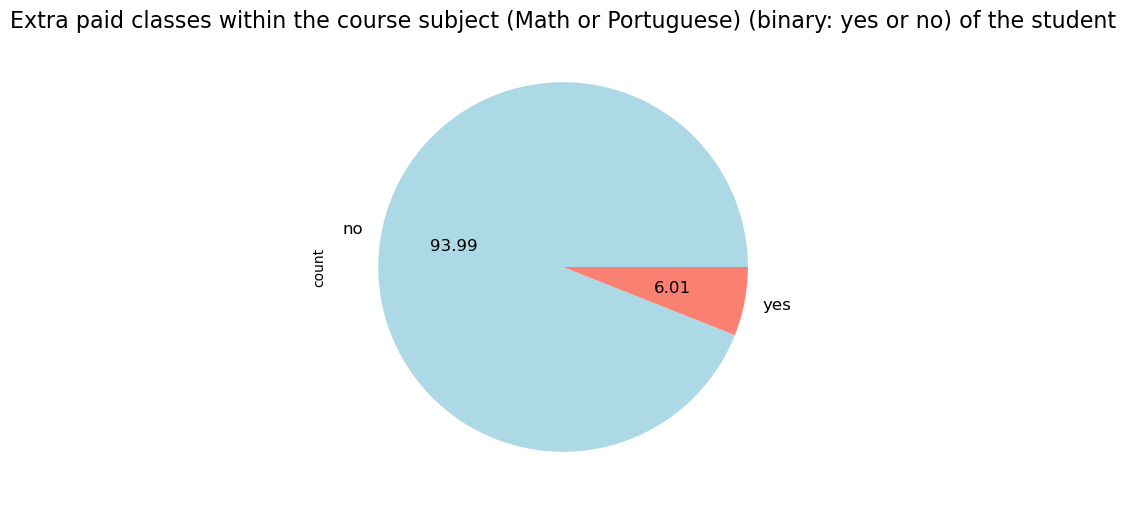

In [35]:
data['paid'].value_counts().plot.pie(autopct='%.2f',figsize=(8,6),fontsize=12,colors=['lightblue','salmon'])
plt.title("Extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) of the student",fontsize=16)

Text(0.5, 1.0, 'Extra-curricular activities (binary: yes or no)')

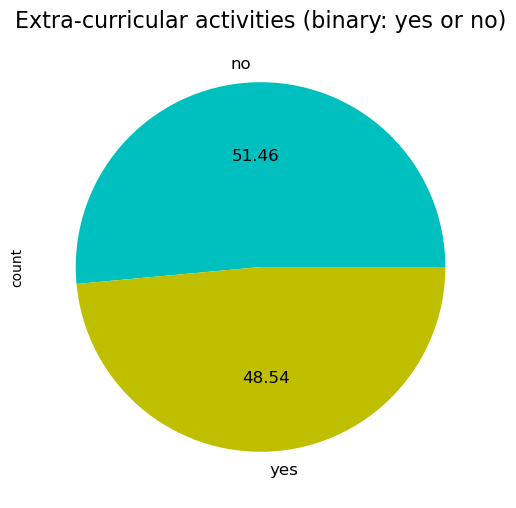

In [36]:
data['activities'].value_counts().plot.pie(autopct='%.2f',figsize=(8,6),fontsize=12,colors=['c','y'])
plt.title("Extra-curricular activities (binary: yes or no)",fontsize=16)

Text(0.5, 1.0, 'attended nursery school (binary: yes or no)')

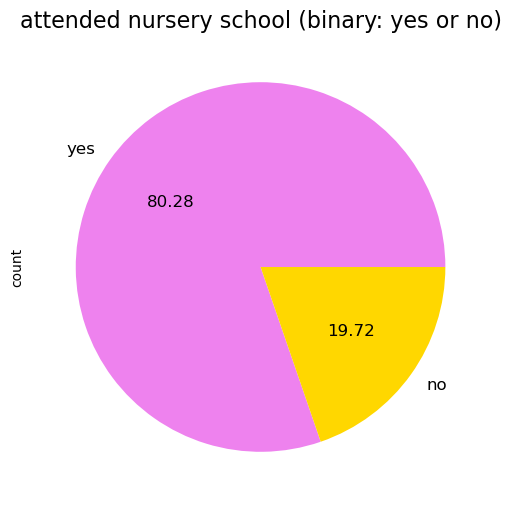

In [37]:
data['nursery'].value_counts().plot.pie(autopct='%.2f',figsize=(8,6),fontsize=12,colors=['violet','gold'])
plt.title("attended nursery school (binary: yes or no)",fontsize=16)

Text(0.5, 1.0, 'wants to take higher education (binary: yes or no)')

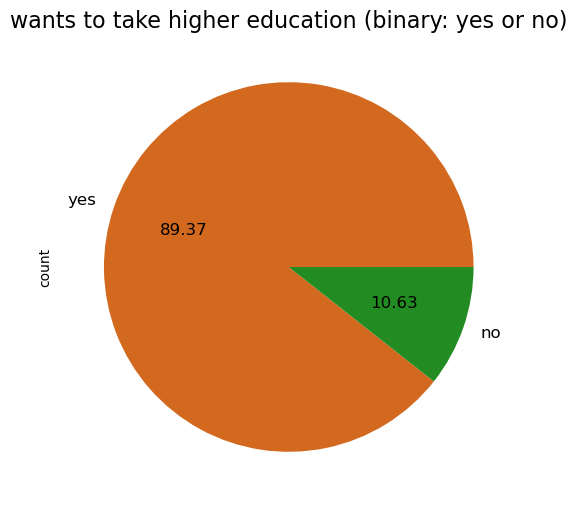

In [38]:
data['higher'].value_counts().plot.pie(autopct='%.2f',figsize=(8,6),fontsize=12,colors=['chocolate','forestgreen'])
plt.title("wants to take higher education (binary: yes or no)",fontsize=16)

Text(0.5, 1.0, 'Internet access at home (binary: yes or no)')

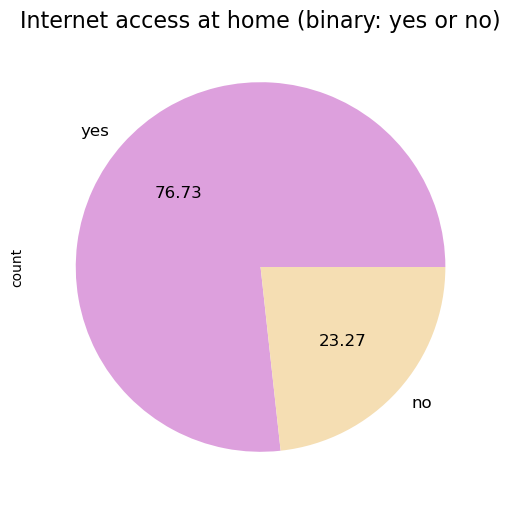

In [39]:
data['internet'].value_counts().plot.pie(autopct='%.2f',figsize=(8,6),fontsize=12,colors=['plum','wheat'])
plt.title("Internet access at home (binary: yes or no)",fontsize=16)

Text(0.5, 1.0, 'With a romantic relationship (binary: yes or no)')

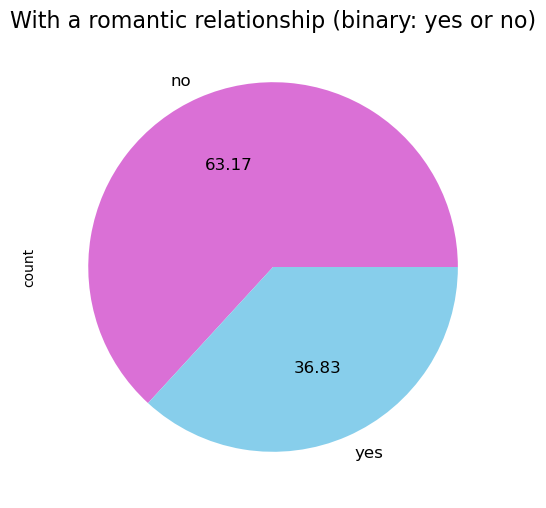

In [40]:
data['romantic'].value_counts().plot.pie(autopct='%.2f',figsize=(8,6),fontsize=12,colors=['orchid','skyblue'])
plt.title("With a romantic relationship (binary: yes or no)",fontsize=16)

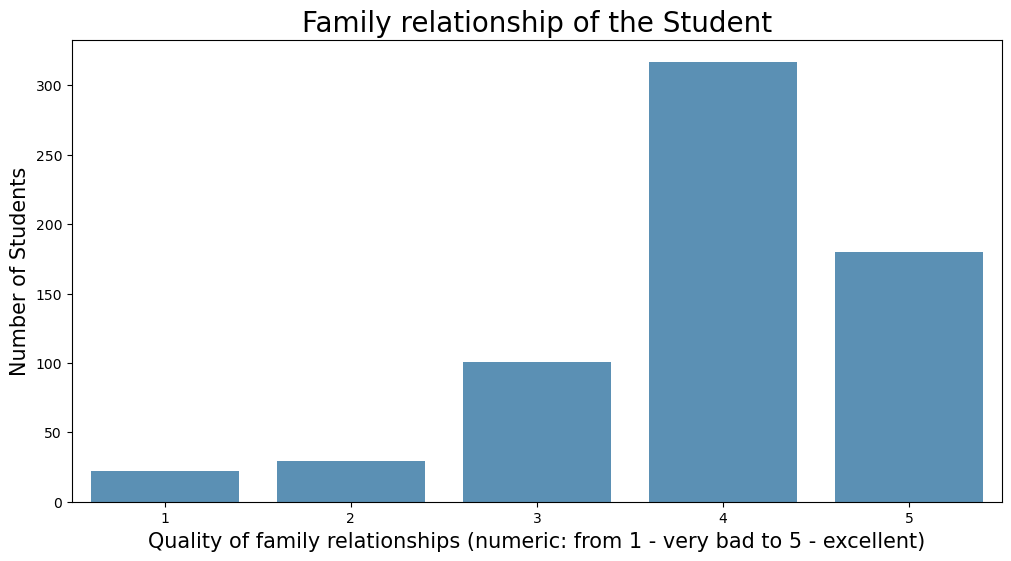

In [41]:
count=data['famrel'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=count.index,y=count.values, alpha=0.8)
plt.title("Family relationship of the Student", fontsize=20)
plt.ylabel('Number of Students', fontsize=15)
plt.xlabel("Quality of family relationships (numeric: from 1 - very bad to 5 - excellent)", fontsize=15)
plt.show()

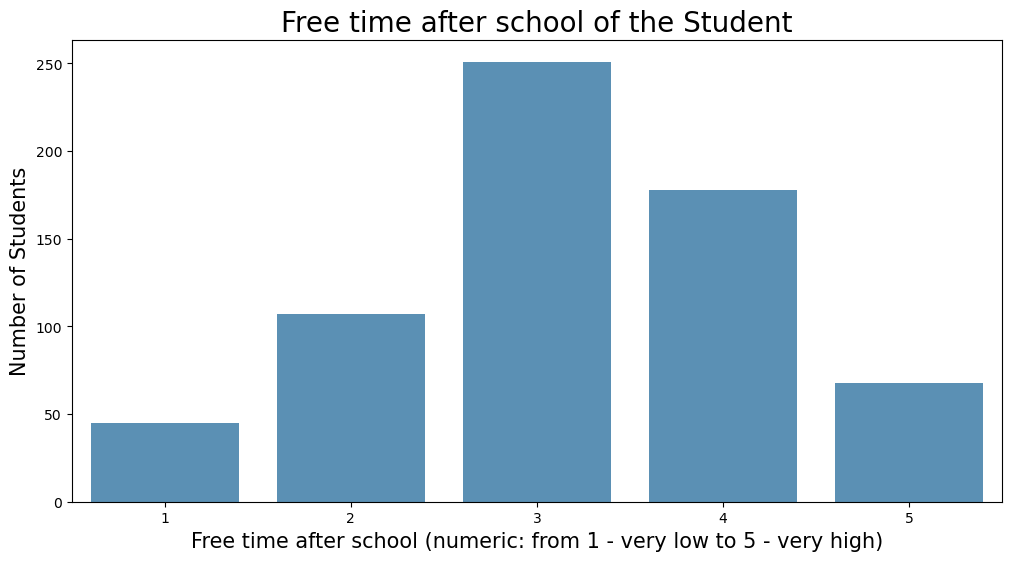

In [42]:
count=data['freetime'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=count.index,y=count.values, alpha=0.8)
plt.title("Free time after school of the Student", fontsize=20)
plt.ylabel('Number of Students', fontsize=15)
plt.xlabel("Free time after school (numeric: from 1 - very low to 5 - very high)", fontsize=15)
plt.show()

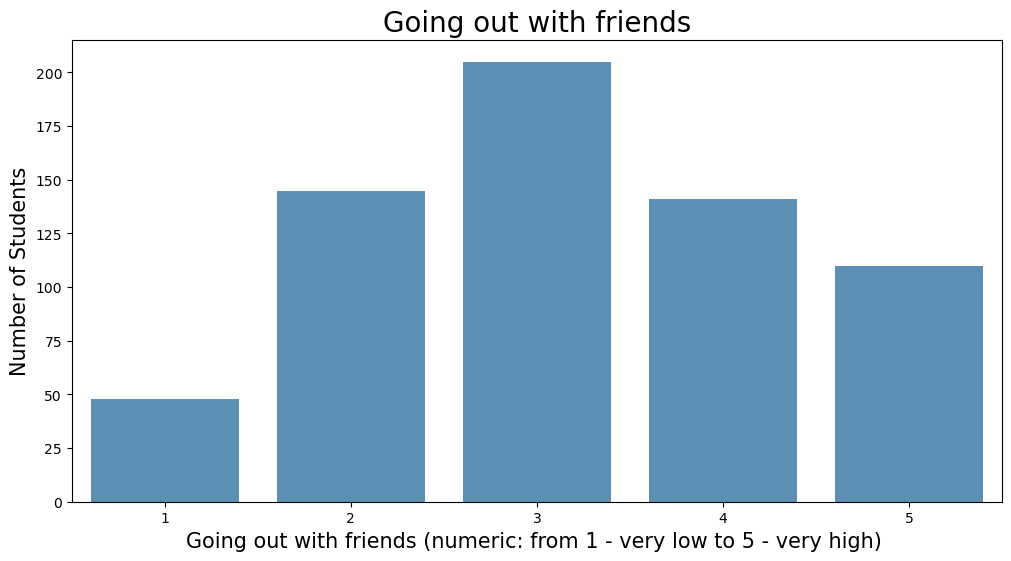

In [43]:
count=data['goout'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=count.index,y=count.values, alpha=0.8)
plt.title("Going out with friends", fontsize=20)
plt.ylabel('Number of Students', fontsize=15)
plt.xlabel("Going out with friends (numeric: from 1 - very low to 5 - very high) ", fontsize=15)
plt.show()

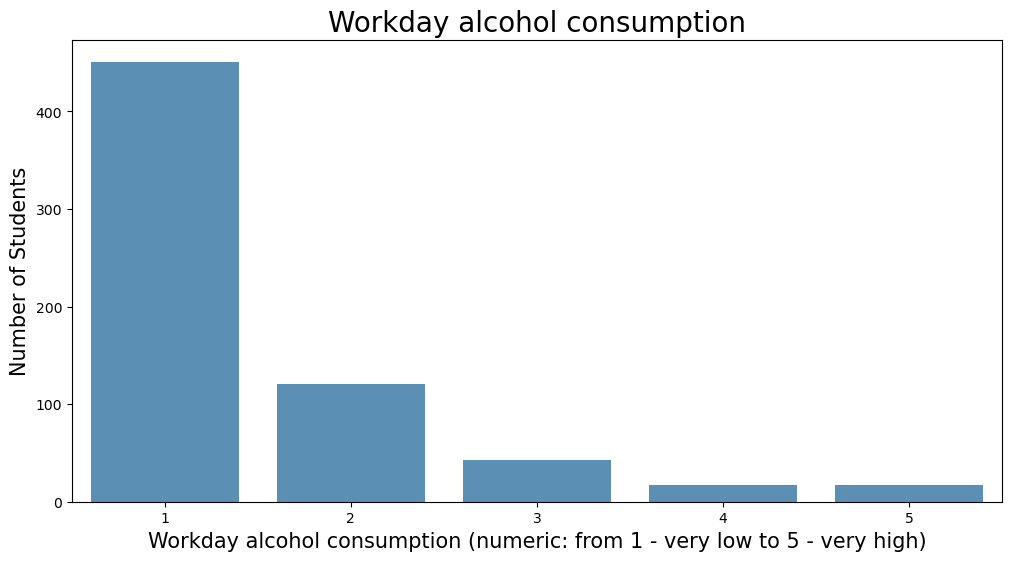

In [44]:
count=data['Dalc'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=count.index,y=count.values, alpha=0.8)
plt.title("Workday alcohol consumption", fontsize=20)
plt.ylabel('Number of Students', fontsize=15)
plt.xlabel("Workday alcohol consumption (numeric: from 1 - very low to 5 - very high)", fontsize=15)
plt.show()

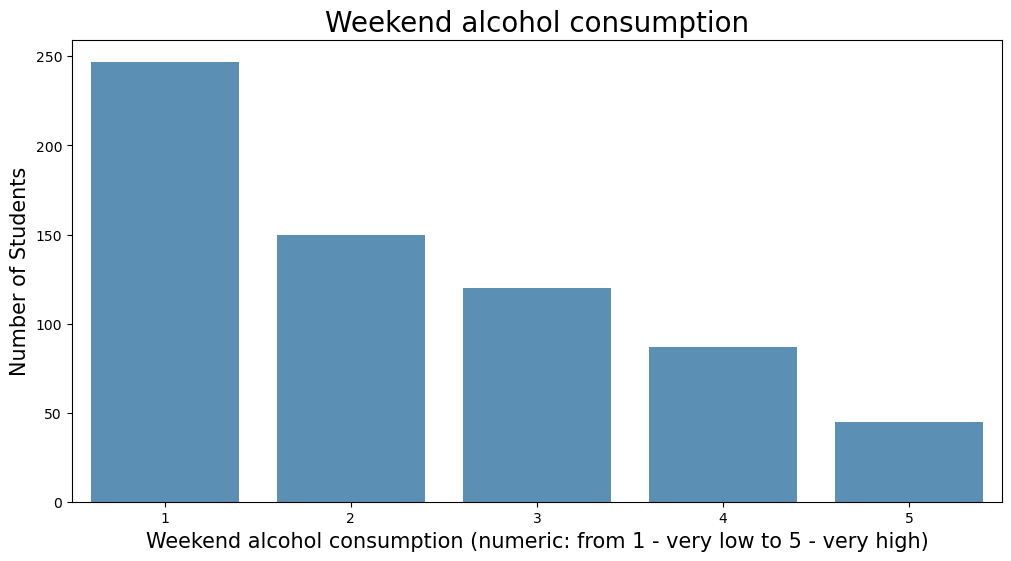

In [45]:
count=data['Walc'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=count.index,y=count.values, alpha=0.8)
plt.title("Weekend alcohol consumption", fontsize=20)
plt.ylabel('Number of Students', fontsize=15)
plt.xlabel("Weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)", fontsize=15)
plt.show()

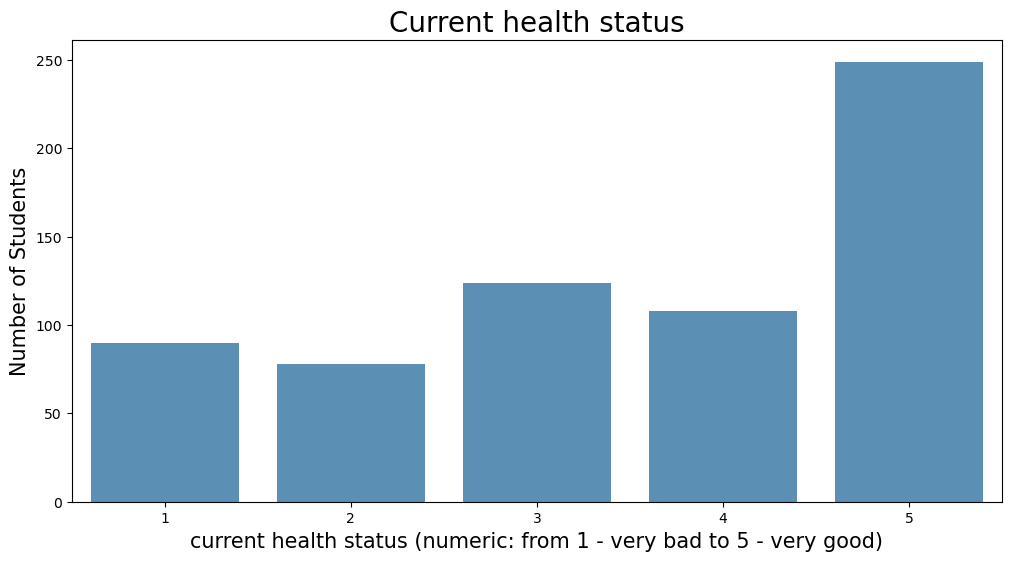

In [46]:
count=data['health'].value_counts()
plt.figure(figsize=(12,6))
sns.barplot(x=count.index,y=count.values, alpha=0.8)
plt.title("Current health status", fontsize=20)
plt.ylabel('Number of Students', fontsize=15)
plt.xlabel("current health status (numeric: from 1 - very bad to 5 - very good)", fontsize=15)
plt.show()

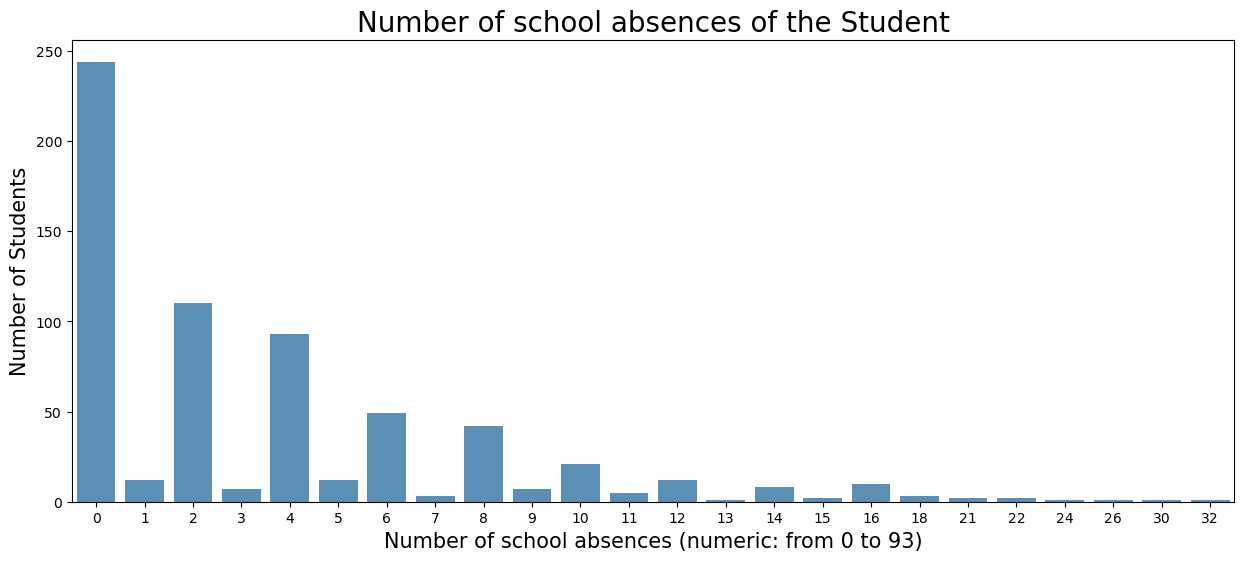

In [47]:
count=data['absences'].value_counts()
plt.figure(figsize=(15,6))
sns.barplot(x=count.index,y=count.values, alpha=0.8)
plt.title("Number of school absences of the Student", fontsize=20)
plt.ylabel('Number of Students', fontsize=15)
plt.xlabel("Number of school absences (numeric: from 0 to 93)", fontsize=15)
plt.show()

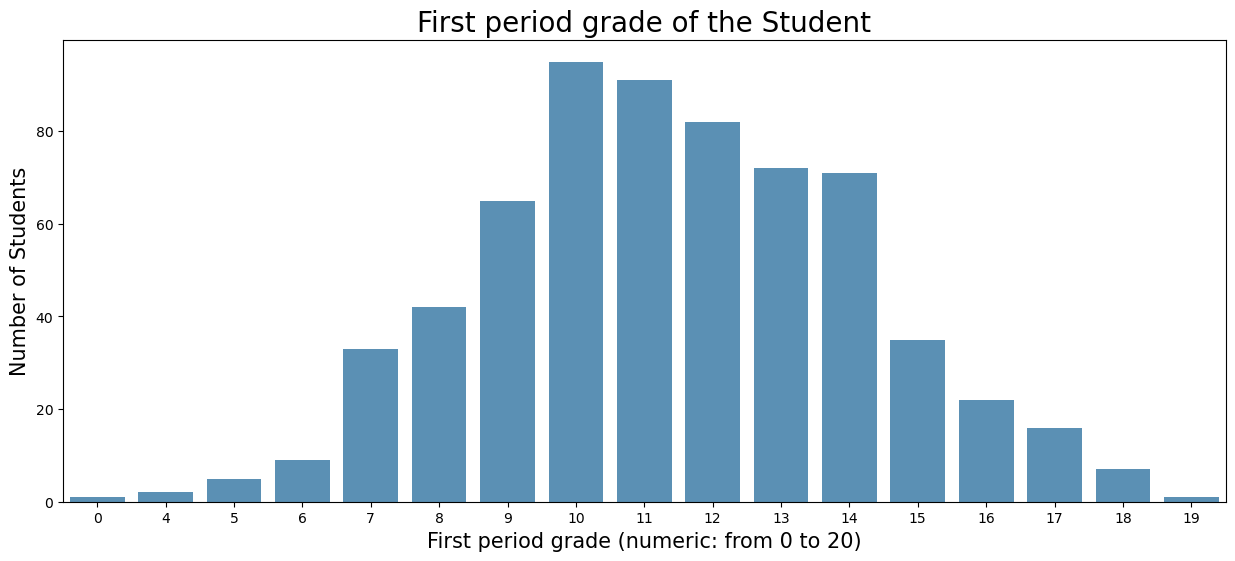

In [48]:
count=data['G1'].value_counts()
plt.figure(figsize=(15,6))
sns.barplot(x=count.index,y=count.values, alpha=0.8)
plt.title("First period grade of the Student", fontsize=20)
plt.ylabel('Number of Students', fontsize=15)
plt.xlabel("First period grade (numeric: from 0 to 20)", fontsize=15)
plt.show()

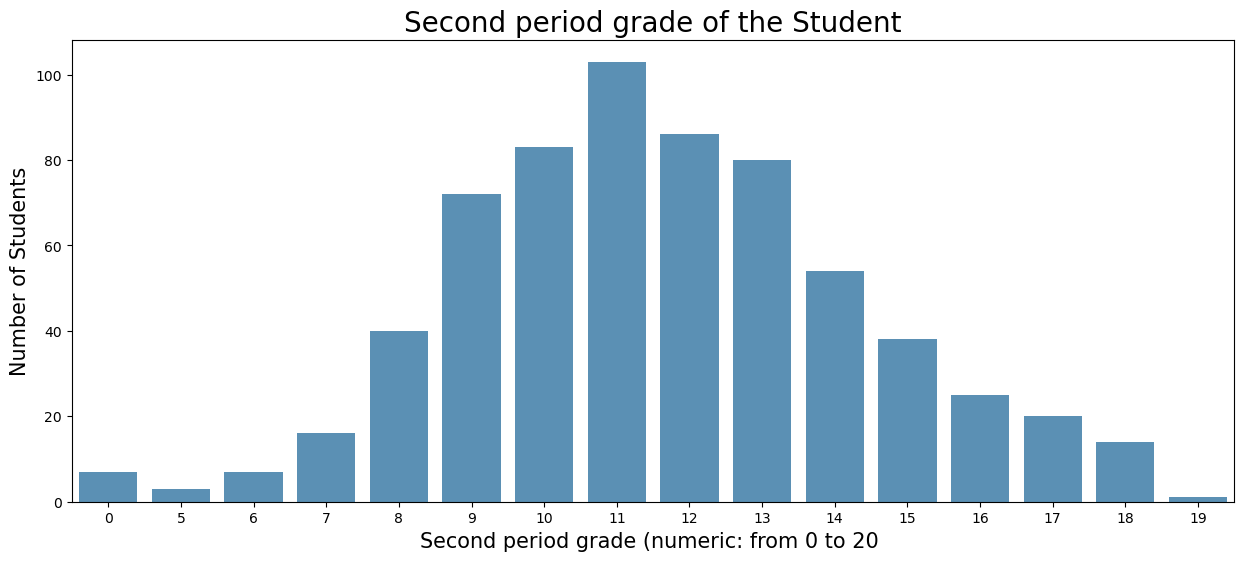

In [49]:
count=data['G2'].value_counts()
plt.figure(figsize=(15,6))
sns.barplot(x=count.index,y=count.values, alpha=0.8)
plt.title("Second period grade of the Student", fontsize=20)
plt.ylabel('Number of Students', fontsize=15)
plt.xlabel("Second period grade (numeric: from 0 to 20 ", fontsize=15)
plt.show()

## Data Training

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [51]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [52]:
prepareddata=data.drop(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime','schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'Dalc',
       'Walc'],axis=1)
prepareddata

,studytime,failures,famrel,freetime,goout,health,absences,G1,G2,G3
0,2,0,4,3,4,3,4,0,11,11
1,2,0,5,3,3,3,2,9,11,11
2,2,0,4,3,2,3,6,12,13,12
3,3,0,3,2,2,5,0,14,14,14
4,2,0,4,3,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...
644,3,1,5,4,2,5,4,10,11,10
645,2,0,4,3,4,1,4,15,15,16
646,2,0,1,1,1,5,6,11,12,9
647,1,0,2,4,5,2,6,10,10,10


In [53]:
prepareddata.columns

Index(['studytime', 'failures', 'famrel', 'freetime', 'goout', 'health',
       'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [54]:
prepareddata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   studytime  649 non-null    int64
 1   failures   649 non-null    int64
 2   famrel     649 non-null    int64
 3   freetime   649 non-null    int64
 4   goout      649 non-null    int64
 5   health     649 non-null    int64
 6   absences   649 non-null    int64
 7   G1         649 non-null    int64
 8   G2         649 non-null    int64
 9   G3         649 non-null    int64
dtypes: int64(10)
memory usage: 50.8 KB


In [55]:
prepareddata.describe()

,studytime,failures,famrel,freetime,goout,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,1.930663,0.221880,3.930663,3.180277,3.184900,3.536210,3.659476,11.399076,11.570108,11.906009
std,0.829510,0.593235,0.955717,1.051093,1.175766,1.446259,4.640759,2.745265,2.913639,3.230656
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,4.000000,3.000000,2.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,2.000000,0.000000,4.000000,3.000000,3.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,2.000000,0.000000,5.000000,4.000000,4.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


<Axes: >

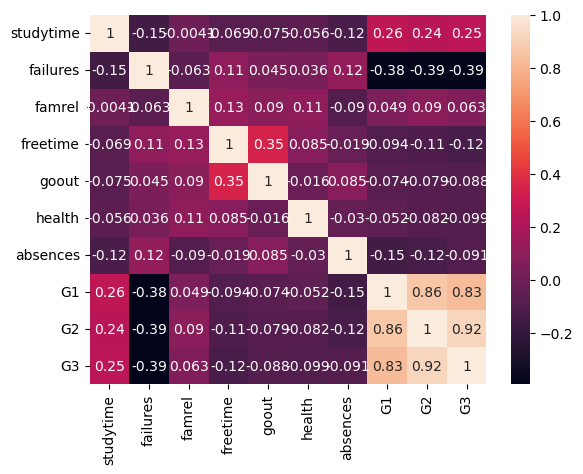

In [56]:
corr = prepareddata.corr() 
sns.heatmap(corr, annot=True)

In [57]:
# Import train_test_split from sklearn.model_selection
from sklearn.model_selection import train_test_split
# Here, X is the data which will have features that affect student's performance and y will have our target G3i.e. final grade.
x=prepareddata[['studytime', 'failures', 'famrel', 'freetime', 'goout', 'health','absences', 'G1', 'G2']]  
y=prepareddata['G3']

In [58]:
# Split data into training data and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=100) 
#Ratio used for splitting training and testing data is 8:2 respectively

## Model Creation

Linear Regression

In [59]:
# Importing linear regression model
from sklearn.linear_model import LinearRegression 
reg1 = LinearRegression()

In [60]:
# Fitting data into the model.
reg1.fit(x_train, y_train)

LinearRegression()

In [61]:
# Making predictions 
pred1 = reg1.predict(x_test)

In [62]:
pred1

array([ 5.87235294,  8.24733246, 18.43556003, 12.15775162, 12.19499069,
       12.25201614, 11.0576008 , 10.0228101 ,  0.29942162, 13.09502938,
        8.67100818, 17.11477321, 11.08549307, 15.04930522,  9.75161352,
       17.09938819, 11.36522308, 12.5731234 , 15.70622706, 15.35191265,
       12.82883321, 16.40206615, 11.39784336, 12.43826496,  9.41609947,
        8.02903748, 11.56774322, 16.96287392, 11.20935768, 11.03102494,
       13.08340762, 10.95002545, 15.00178358, 12.14632769, 11.20790142,
       10.14904698, 13.38459878, 11.60036395,  9.34121292,  8.22019063,
       14.56659911,  7.92479422, 11.70834767,  9.30857567, 10.75263676,
       11.03637517, 16.04058282, 12.31746341, 11.13818518, 18.37447505,
        9.96135993, 15.36801098,  7.908889  , 10.77182075, 11.33349434,
       15.72851747,  7.86836939, 10.30547261, 14.23652481, 11.23957972,
       12.24550484, 13.45812015, 18.5562363 , 10.65003663,  8.62766306,
        7.18210079,  8.32250228, 10.3251571 , 14.64973088, 11.08

In [63]:
print("Accuracy of the Linear Regression model comes to be: \n ") 
print(reg1.score(x_train,y_train))

Accuracy of the Linear Regression model comes to be: 
 
0.8493517628952961


Lasso Regression

In [64]:
# Importing model
from sklearn.linear_model import Lasso
reg2 = Lasso()

In [65]:
# Fitting data into the model.
reg2.fit(x_train, y_train)

Lasso()

In [66]:
# Making predictions 
pred2 = reg2.predict(x_test)

In [67]:
pred2

array([ 6.14159442,  8.81947079, 17.76735226, 12.34671883, 12.34671883,
       12.28183815, 10.58309481, 10.51821413,  1.63521334, 13.26097118,
        9.40931972, 16.72333854, 11.30270511, 15.0245952 , 10.45333344,
       16.85309991, 11.43246648, 12.21695746, 15.08947589, 15.0245952 ,
       12.4764802 , 15.93884755, 11.49734716, 12.41159951,  9.66884246,
        8.62482874, 11.36758579, 16.00372824, 11.36758579, 11.36758579,
       13.1960905 , 11.36758579, 14.89483383, 12.28183815, 11.36758579,
       10.51821413, 13.32585187, 11.30270511,  9.73372314,  8.68970942,
       14.17522353,  8.62482874, 11.49734716,  9.53908109, 10.51821413,
       11.36758579, 15.7442055 , 12.34671883, 11.43246648, 17.76735226,
       10.45333344, 15.08947589,  7.90521844, 10.58309481, 11.36758579,
       15.08947589,  8.75459011, 10.51821413, 14.17522353, 11.36758579,
       12.28183815, 13.1960905 , 17.76735226, 10.51821413,  8.81947079,
        7.77545707,  9.47420041, 10.45333344, 14.17522353, 11.36

In [68]:
print("Accuracy of the Lasso Regression model comes to be: \n ") 
print(reg2.score(x_train,y_train))

Accuracy of the Lasso Regression model comes to be: 
 
0.8315785087125718


Decision Tree Regressor

In [69]:
# Importing decision tree regressor 
from sklearn.tree import DecisionTreeRegressor 
reg3 = DecisionTreeRegressor()

In [70]:
#Fitting data into the model.
reg3.fit(x_train, y_train)

DecisionTreeRegressor()

In [71]:
# Making predictions on Test data 
pred3 = reg3.predict(x_test)

In [72]:
pred3

array([ 8. ,  9. , 18. , 12. , 13. , 13. , 11. , 11. ,  0. , 14. ,  8. ,
       17. , 10. , 15. , 11. , 18. , 14. , 12. , 17. , 16. , 13. , 17. ,
       10. , 12. , 10. ,  8. , 12. , 16. , 14. , 11. , 13. , 11. , 15. ,
       11. , 11. , 10. , 14. , 11. , 10. ,  8. , 14. ,  7. , 12. ,  8. ,
       11. , 14. , 15. , 13. , 14. , 18. , 10. , 16. ,  8. , 11. , 12. ,
       17. ,  7. , 11. , 14. , 12. , 13.5, 13. , 18. , 10. , 10. ,  8. ,
        8. , 11. , 14. , 14. , 10. , 10. , 11. , 19. , 12. , 14. , 12. ,
       10. ,  8. , 11. , 10. , 11. , 14. , 15. , 16. ,  7. , 10. , 14. ,
       11. , 11. ,  9. , 12. ,  7. ,  8. , 11. ,  9. , 13. ,  8. , 10. ,
        9. ,  7. , 11. , 11. ,  9. , 10. , 11. , 16. , 11. , 10. , 10. ,
       12. , 12. , 13. , 12. , 16. , 16. , 16. , 15. , 17. , 17. , 11. ,
       16. , 15. , 15. , 13. , 11. , 10. , 13. , 18. , 16. ])

In [73]:
print("Accuracy of the Decision Tree Regressor  model comes to be: \n ") 
print(reg3.score(x_train,y_train))

Accuracy of the Decision Tree Regressor  model comes to be: 
 
0.9994471375430892


Random Forest Regressor

In [74]:
#Importing random forest regressor 
from sklearn.ensemble import RandomForestRegressor 
reg4 = RandomForestRegressor(n_estimators=100)

In [75]:
# Fitting data into the model.
reg4.fit(x_train, y_train)

RandomForestRegressor()

In [76]:
#making predictions.
pred4 = reg4.predict(x_test)

In [77]:
pred4

array([ 6.89      ,  8.28      , 17.6       , 12.52      , 12.73      ,
       12.46666667, 10.51      , 11.41      ,  0.36      , 13.08666667,
        8.9       , 17.05      , 10.62      , 15.63      , 10.02      ,
       17.5       , 11.47      , 12.71      , 15.56      , 15.29      ,
       13.06166667, 16.14      , 11.01      , 12.92166667,  9.21      ,
        8.13      , 11.72      , 15.95      , 11.69      , 11.66      ,
       12.77666667, 11.4175    , 15.25      , 11.89      , 11.5       ,
       10.25      , 13.44      , 11.04      , 10.22      ,  8.29      ,
       14.74      ,  7.87      , 11.375     ,  9.14      , 10.88      ,
       12.        , 15.49      , 12.68066667, 11.77      , 17.75      ,
       10.25      , 16.04      ,  7.53      , 10.84      , 11.69      ,
       16.28      ,  6.95      , 10.47      , 14.73      , 11.54      ,
       12.27      , 13.03      , 17.92      , 10.62      ,  7.64      ,
        7.77      ,  8.6       , 10.34      , 14.67      , 12.16

In [78]:
print("Accuracy of the Random Forest Regressor  model comes to be: \n ") 
print(reg4.score(x_train,y_train))

Accuracy of the Random Forest Regressor  model comes to be: 
 
0.9769916336428495


## Performance check

In [79]:
import numpy as np
from sklearn.metrics import mean_squared_error
print("Model\t\t\t          RootMeanSquareError  \t\t Accuracy of the model") 
print("""Linear Regression       \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred1)), reg1.score(x_train,y_train)))
print("""Lasso Regression        \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred2)), reg2.score(x_train,y_train)))
print("""Decision Tree Regressor \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred3)), reg3.score(x_train,y_train)))
print("""Random Forest Regressor \t\t {:.4f} \t \t\t {:.4f}""".format(  np.sqrt(mean_squared_error(y_test, pred4)), reg4.score(x_train,y_train)))

Model			          RootMeanSquareError  		 Accuracy of the model
Linear Regression       		 1.2218 	 		 0.8494
Lasso Regression        		 1.2391 	 		 0.8316
Decision Tree Regressor 		 1.5424 	 		 0.9994
Random Forest Regressor 		 1.2819 	 		 0.9770


## Conclusion:
Accuracy of Decision Tree Regressor is higher than Linear Regression, Lasso Regression and Random Forest Regressor.

Thank You
* Navin Singh